In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## question 1

In [4]:
#import dataset
delivary_data=pd.read_csv('delivery_time.csv')
delivary_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
delivary_data.shape

(21, 2)

In [6]:
delivary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
# checking null values
delivary_data.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
delivary_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
delivary_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [11]:
#checking dupkicated values
delivary_data.duplicated().sum()

0

In [21]:
# column renaming
delivary_data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1,inplace=True)
delivary_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


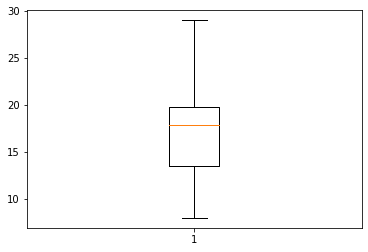

In [25]:
plt.boxplot(delivary_data['Delivery_Time'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1764c08a7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1764c08af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1764c08a460>],
 'medians': [<matplotlib.lines.Line2D at 0x1764c064610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1764c0649a0>],
 'means': []}

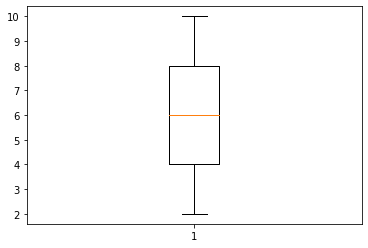

In [27]:
plt.boxplot(delivary_data['Sorting_Time'])

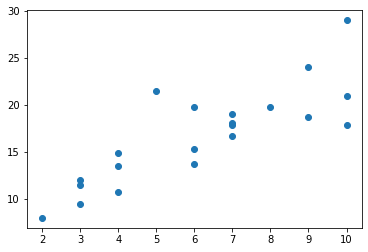

In [30]:
plt.scatter(x='Sorting_Time',y='Delivery_Time',data=delivary_data)
plt.xlabel('Sorting_Time')
plt.ylabel('y='Delivery_Time'')
plt.show()

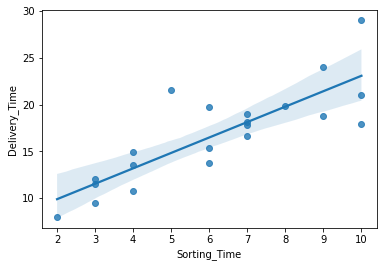

In [32]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=delivary_data)
plt.show()

In [33]:
#finding codilation coefficienht
delivary_data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


there is a strong corrlelation between deliaery time and delivary data.

## MODEL BUILDING

In [36]:
model=sm.ols('Delivery_Time~Sorting_Time',data=delivary_data).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        11:53:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

### DELIVARY_TIME = 6.582734 + 1.649020 * Sorting_Time

In [49]:
## STANDARDIZING THE VARIABLES
scale=StandardScaler()
std=scale.fit_transform(delivary_data)
std

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462],
       [-0.2909489 , -0.07678123],
       [ 0.44603831,  0.32632023],
       [-1.47214757, -1.28608562],
       [ 0.22393258,  1.53562462],
       [ 0.39555973,  1.13252315],
       [ 0.61362718,  0.72942169],
       [-1.21975469, -0.88298415],
       [-0.02240287,  0.32632023],
       [-1.06831896, -1.28608562],
       [-0.96130438, -1.28608562],
       [-0.38584862, -0.88298415],
       [-0.61401178, -0.07678123],
       [ 0.26633458,  0.32632023],
       [-1.77501902, -1.68918708],
       [ 0.20979858,  0.32632023],
       [ 0.95082407, -0.47988269]])

In [44]:
delivary_data_std=pd.DataFrame(std,columns=delivary_data.columns)
delivary_data_std

,Delivery_Time,Sorting_Time
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [46]:
delivary_data_std.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [47]:
model_2=sm.ols('Delivery_Time~Sorting_Time',data=delivary_data).fit()

In [48]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        12:10:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## question 2


In [51]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [52]:
salary_data.shape

(30, 2)

In [53]:
salary_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [54]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [55]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [56]:
salary_data.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1764e0fb550>,
 'caps': [<matplotlib.lines.Line2D at 0x1764e0fbb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1764e0d6ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1764e2083d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1764e102550>],
 'means': []}

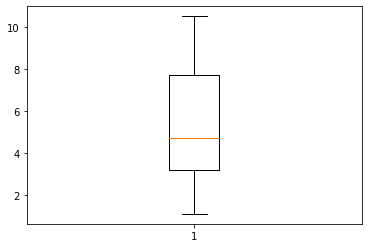

In [57]:
plt.boxplot(salary_data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1764c8dd0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1764dc82910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1764b1d9520>],
 'medians': [<matplotlib.lines.Line2D at 0x1764dc82370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1764d0a6f40>],
 'means': []}

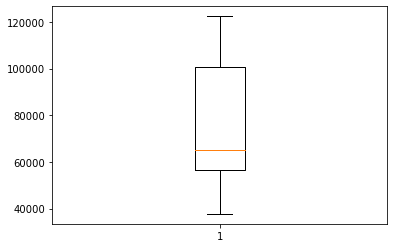

In [58]:
plt.boxplot(salary_data['Salary'])

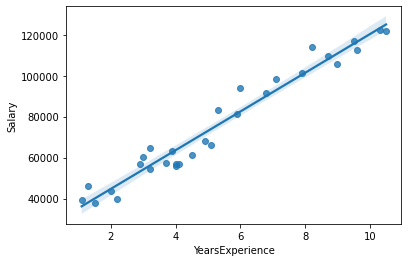

In [59]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_data)
plt.show()

In [60]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## model building

In [64]:
linearmodel=sm.ols('Salary~YearsExperience',data=salary_data).fit()

In [65]:
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        12:48:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
linearmodel.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### salary= 25792.200199+YearsExperience*9449.962321